includes everything except words analysis

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("ml_test.xlsx")

In [3]:
df.head()

,label,name,username,bio,location,url,join_date,join_time,tweets,following,followers,likes,media,private,verified,profile_image_url,background_image,color_number,face_detection,Follower/following ratio
0,Business,Avex Funding,avexfundingeast,We are now Better Mortgage. Follow us at @bett...,NaN,http://better.com,41823.0,0.619444,1495.0,1954.0,900.0,1969.0,493.0,0.0,0.0,https://pbs.twimg.com/profile_images/668877725...,https://pbs.twimg.com/profile_banners/26023041...,17.0,0.0,0.460594
1,Business,Harmoney,HarmoneyNZ,"Borrow for less, invest for more - Harmoney is...","Auckland, New Zealand",http://www.harmoney.co.nz,41739.0,0.662500,1640.0,375.0,981.0,141.0,341.0,0.0,0.0,https://pbs.twimg.com/profile_images/638454145...,https://pbs.twimg.com/profile_banners/24376079...,17.0,0.0,2.616000
2,Business,ÃƒÂªtre,etretobe,Scales small businesses from start-up to matur...,NaN,http://etretobe.com,41583.0,0.658333,30.0,440.0,54.0,3.0,6.0,0.0,0.0,https://pbs.twimg.com/profile_images/688867880...,https://pbs.twimg.com/profile_banners/21770204...,18.0,0.0,0.122727
3,Business,InDebted,InDebtedHQ,A #fintech startup transforming the debt colle...,"Sydney, New South Wales",https://www.indebted.co/,42473.0,0.994444,93.0,127.0,107.0,103.0,17.0,0.0,0.0,https://pbs.twimg.com/profile_images/110089932...,NaN,23.0,0.0,0.842520
4,Business,LinkedFinance.com,LinkedFinance,Linked Finance is IrelandÃ¢â‚¬â„¢s leading P2P...,Nationwide,http://www.linkedfinance.com,40432.0,0.688194,2930.0,2336.0,2722.0,1055.0,713.0,0.0,0.0,https://pbs.twimg.com/profile_images/668742326...,https://pbs.twimg.com/profile_banners/18968711...,32.0,0.0,1.165240


In [4]:
df.shape

(1681, 20)

In [5]:
df.columns

Index(['label', 'name', 'username', 'bio', 'location', 'url', 'join_date',
       'join_time', 'tweets', 'following', 'followers', 'likes', 'media',
       'private', 'verified', 'profile_image_url', 'background_image',
       'color_number', 'face_detection', 'Follower/following ratio'],
      dtype='object')

In [6]:
array = []
for i in list(df["url"]):
    if str(i) != "nan":
        array.append(1)
    else:
        array.append(0)
df["url_detect"] = array

In [7]:
df = df.drop(columns = ["name", "url", "username", "bio", "location", "join_date", "join_time", \
                        "private", "verified", "profile_image_url", "background_image", "following", "followers"])

In [8]:
df.head()

,label,tweets,likes,media,color_number,face_detection,Follower/following ratio,url_detect
0,Business,1495.0,1969.0,493.0,17.0,0.0,0.460594,1
1,Business,1640.0,141.0,341.0,17.0,0.0,2.616000,1
2,Business,30.0,3.0,6.0,18.0,0.0,0.122727,1
3,Business,93.0,103.0,17.0,23.0,0.0,0.842520,1
4,Business,2930.0,1055.0,713.0,32.0,0.0,1.165240,1


In [9]:
df = df.dropna(how="any")
# only 2 rows
df["label"]

0         Business
1         Business
2         Business
3         Business
4         Business
5         Business
6         Business
7       Individual
8         Business
9         Business
10        Business
11        Business
12        Business
13        Business
14        Business
15        Business
16      Individual
17        Business
18        Business
19      Individual
20      Individual
21      Individual
22      Individual
23        Business
24        Business
25      Individual
26        Business
27        Business
28        Business
29      Individual
           ...    
1649    Individual
1650    Individual
1651    Individual
1652    Individual
1653    Individual
1654    Individual
1655    Individual
1656    Individual
1657    Individual
1658    Individual
1659    Individual
1660    Individual
1661    Individual
1662    Individual
1663    Individual
1664    Individual
1665    Individual
1666    Individual
1667    Individual
1668    Individual
1669    Individual
1670    Indi

In [10]:
# Assign X (data) and y (target)
X = df.drop("label", axis=1)
y = df["label"]
print(X.shape, y.shape)

(1679, 7) (1679,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

/Users/kyleeng/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [13]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/kyleeng/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kyleeng/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


Using TensorFlow backend.


k: 1, Train/Test Score: 1.000/0.907
k: 2, Train/Test Score: 0.942/0.888
k: 3, Train/Test Score: 0.937/0.919
k: 4, Train/Test Score: 0.934/0.921
k: 5, Train/Test Score: 0.934/0.924
k: 6, Train/Test Score: 0.932/0.919
k: 7, Train/Test Score: 0.932/0.919
k: 8, Train/Test Score: 0.929/0.917
k: 9, Train/Test Score: 0.932/0.924
k: 10, Train/Test Score: 0.930/0.926
k: 11, Train/Test Score: 0.929/0.921
k: 12, Train/Test Score: 0.927/0.921
k: 13, Train/Test Score: 0.929/0.921
k: 14, Train/Test Score: 0.926/0.921
k: 15, Train/Test Score: 0.929/0.921
k: 16, Train/Test Score: 0.928/0.919
k: 17, Train/Test Score: 0.928/0.919
k: 18, Train/Test Score: 0.928/0.919
k: 19, Train/Test Score: 0.928/0.919


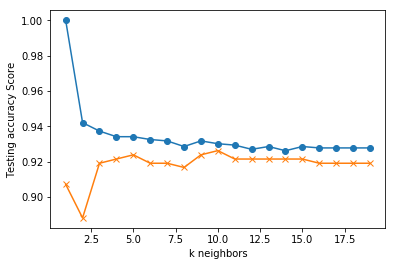

In [20]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 1), train_scores, marker='o')
plt.plot(range(1, 20, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [22]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print('k=2 Test Acc: %.3f' % knn.score(X_test, y_test))

k=2 Test Acc: 0.829


In [23]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier
# classifier.fit(X_train, y_train)

# predictions = classifier.predict(X_test)
# egg = pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [ ]:
# newegg = egg[egg["Prediction"] != egg["Actual"]]

In [ ]:
# newestegg = list(newegg.index)
# newestegg

In [ ]:
# df.loc[newestegg]